<a href="https://colab.research.google.com/github/0alfajar/Machine-Learning-Model-From-Scratch/blob/main/Linear_Regression_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing the dependencies
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Linear Regression

In [2]:
class Linear_Regression():

# initiating the parameters (learning rate & no. of iterations)
    def __init__(self, learning_rate, no_of_iterations):
      self.learning_rate = learning_rate
      self.no_of_iterations = no_of_iterations
    def fit(self, X, y):
      # number of training examples & number of features
      self.m, self.n = X.shape

      # initiating the weight and bias
      self.W = np.zeros(self.n)
      self.b = 0
      self.X = X
      self.y = y

      # gradient descent
      for i in range(self.no_of_iterations):
        self.update_weights()

    def update_weights(self, ):
      Y_pred = self.predict(self.X)
      # calculate gradient
      dW = -(2/self.m) * self.X.T.dot(self.y - Y_pred)
      db = -(2/self.m) * np.sum(self.y - Y_pred)

      # updating the weights
      self.W = self.W - self.learning_rate * dW
      self.b = self.b - self.learning_rate * db

    def predict(self, X):
      return X.dot(self.W) + self.b

Using Linear Regression model for prediction

Data Preprocessing

In [3]:
# importing the data from csv file to dataframe
salary_data = pd.read_csv('salary_data.csv')

In [4]:
# printing first  coluumns of data
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [5]:
salary_data.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [6]:
# number row and columns
salary_data.shape

(30, 2)

In [7]:
# checking missing value
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

Splitting Feature and Target

In [8]:
X = salary_data.iloc[:, :-1].values
y = salary_data.iloc[:, 1].values

In [9]:
print(X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [10]:
print(y)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


Splitting data into training and testing data

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 2)

Training the Linear Regression model

In [12]:
model = Linear_Regression(learning_rate = 0.02, no_of_iterations = 1000)

In [13]:
model.fit(X_train, y_train)

In [14]:
# printing the parameter values

print('weight : ', model.W[0])
print('bias : ', model.b)

weight :  9514.400999035135
bias :  23697.406507136307


y = 9514(x) + 23697

salary = 9514(experience) + 23697

predict the salary value for test data

In [15]:
test_data_pred = model.predict(X_test)

In [16]:
print(test_data_pred)

[ 36066.12780588  34163.24760607  66512.21100279  58900.69020357
  91249.65360029  80783.81250135 101715.49469922  52240.60950424
  42726.20850521  88395.33330058]


Visualizing the predicted values and actual values

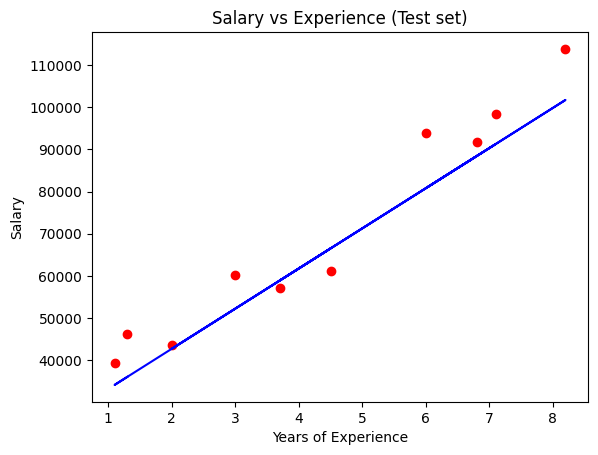

In [17]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, test_data_pred, color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()